| Stock Algos | Momentum Strategy |
| ----------- | ----------- |

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr 
import matplotlib.pyplot as plt

In [3]:
# Yahoo finance API download
ticker = 'pltr'
stock_data = pdr.get_data_yahoo(ticker)

stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-30,11.41,9.1100,10.00,9.5000,338584400,9.5000
2020-10-01,10.10,9.2300,9.69,9.4600,124297600,9.4600
2020-10-02,9.28,8.9400,9.06,9.2000,55018300,9.2000
2020-10-05,9.49,8.9200,9.43,9.0300,36316900,9.0300
2020-10-06,10.18,8.9000,9.04,9.9000,90864000,9.9000
...,...,...,...,...,...,...
2022-12-08,7.27,6.9400,7.10,7.1200,23107700,7.1200
2022-12-09,7.19,7.0300,7.06,7.1100,23346000,7.1100
2022-12-12,7.31,7.0900,7.11,7.2900,22672400,7.2900


In [4]:
# Add day counter
day = np.arange(1, len(stock_data) + 1)
stock_data['day'] = day

stock_data

,High,Low,Open,Close,Volume,Adj Close,day
Date,,,,,,,
2020-09-30,11.41,9.1100,10.00,9.5000,338584400,9.5000,1
2020-10-01,10.10,9.2300,9.69,9.4600,124297600,9.4600,2
2020-10-02,9.28,8.9400,9.06,9.2000,55018300,9.2000,3
2020-10-05,9.49,8.9200,9.43,9.0300,36316900,9.0300,4
2020-10-06,10.18,8.9000,9.04,9.9000,90864000,9.9000,5
...,...,...,...,...,...,...,...
2022-12-08,7.27,6.9400,7.10,7.1200,23107700,7.1200,553
2022-12-09,7.19,7.0300,7.06,7.1100,23346000,7.1100,554
2022-12-12,7.31,7.0900,7.11,7.2900,22672400,7.2900,555


In [5]:
# Drop not needed columns
stock_data.drop(columns=['Adj Close', 'Volume'], inplace=True)

stock_data.head(3)

,High,Low,Open,Close,day
Date,,,,,
2020-09-30,11.41,9.11,10.00,9.50,1
2020-10-01,10.10,9.23,9.69,9.46,2
2020-10-02,9.28,8.94,9.06,9.20,3


In [6]:
# Set column order
stock_data = stock_data[['day', 'Open', 'High', 'Low', 'Close']]

stock_data.head(5)

,day,Open,High,Low,Close
Date,,,,,
2020-09-30,1,10.00,11.41,9.11,9.50
2020-10-01,2,9.69,10.10,9.23,9.46
2020-10-02,3,9.06,9.28,8.94,9.20
2020-10-05,4,9.43,9.49,8.92,9.03
2020-10-06,5,9.04,10.18,8.90,9.90


In [7]:
# Look at the info
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 557 entries, 2020-09-30 to 2022-12-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     557 non-null    int64  
 1   Open    557 non-null    float64
 2   High    557 non-null    float64
 3   Low     557 non-null    float64
 4   Close   557 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 26.1 KB


In [8]:
# Add moving averages to the data frame
"""Fast MA"""
stock_data['9-day'] = stock_data['Close'].rolling(9).mean() # You can do other math functions here not just rolling means

"""Slow MA"""
stock_data['21-day'] = stock_data['Close'].rolling(21).mean()

stock_data


/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/3324785943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['9-day'] = stock_data['Close'].rolling(9).mean() # You can do other math functions here not just rolling means
/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/3324785943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['21-day'] = stock_data['Close'].rolling(21).mean()


,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2020-09-30,1,10.00,11.41,9.1100,9.5000,NaN,NaN
2020-10-01,2,9.69,10.10,9.2300,9.4600,NaN,NaN
2020-10-02,3,9.06,9.28,8.9400,9.2000,NaN,NaN
2020-10-05,4,9.43,9.49,8.9200,9.0300,NaN,NaN
2020-10-06,5,9.04,10.18,8.9000,9.9000,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-08,553,7.10,7.27,6.9400,7.1200,7.292222,7.487143
2022-12-09,554,7.06,7.19,7.0300,7.1100,7.286667,7.493333
2022-12-12,555,7.11,7.31,7.0900,7.2900,7.310000,7.476667


In [9]:
# Look at more recent stock prices
stock_data[19:25]

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2020-10-27,20,10.00,11.040,9.92,10.95,9.747778,NaN
2020-10-28,21,10.66,10.985,10.10,10.85,9.852222,9.729524
2020-10-29,22,10.90,11.100,10.56,10.75,9.967778,9.789048
2020-10-30,23,10.61,10.680,9.85,10.13,10.030000,9.820952
2020-11-02,24,10.23,10.570,10.23,10.54,10.171111,9.884762
2020-11-03,25,10.57,10.940,10.44,10.50,10.315556,9.954762


In [10]:
# Fix look ahead unrealistic
# Roll forward by one day using shift - starting day for a 9 or 21 day moving average should be at day 10 and 22 respectively
stock_data['9-day'] = stock_data['Close'].rolling(9).mean().shift() # IMPORTANT (shift default is one place)

"""Slow MA"""
stock_data['21-day'] = stock_data['Close'].rolling(21).mean().shift() # IMPORTANT - shift() method

/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/3182462622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['9-day'] = stock_data['Close'].rolling(9).mean().shift() # IMPORTANT (shift default is one place)
/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/3182462622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['21-day'] = stock_data['Close'].rolling(21).mean().shift() # IMPORTANT - shift() method


In [11]:
stock_data

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2020-09-30,1,10.00,11.41,9.1100,9.5000,NaN,NaN
2020-10-01,2,9.69,10.10,9.2300,9.4600,NaN,NaN
2020-10-02,3,9.06,9.28,8.9400,9.2000,NaN,NaN
2020-10-05,4,9.43,9.49,8.9200,9.0300,NaN,NaN
2020-10-06,5,9.04,10.18,8.9000,9.9000,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-08,553,7.10,7.27,6.9400,7.1200,7.310000,7.491429
2022-12-09,554,7.06,7.19,7.0300,7.1100,7.292222,7.487143
2022-12-12,555,7.11,7.31,7.0900,7.2900,7.286667,7.493333


In [12]:
# Add a signal column - when to go long or short on a trade
stock_data['signal'] = np.where(stock_data['9-day'] > stock_data['21-day'], 1, 0)
stock_data['signal'] = np.where(stock_data['9-day'] < stock_data['21-day'], -1, stock_data['signal'])

# Drop any of the NA rows - just because we don't have their MA
stock_data.dropna(inplace=True)
stock_data.head()

/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/3365601784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['signal'] = np.where(stock_data['9-day'] > stock_data['21-day'], 1, 0)
/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/3365601784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['signal'] = np.where(stock_data['9-day'] < stock_data['21-day'], -1, stock_data['signal'])
/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/3365601

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2020-10-29,22,10.90,11.10,10.56,10.75,9.852222,9.729524,1
2020-10-30,23,10.61,10.68,9.85,10.13,9.967778,9.789048,1
2020-11-02,24,10.23,10.57,10.23,10.54,10.030000,9.820952,1
2020-11-03,25,10.57,10.94,10.44,10.50,10.171111,9.884762,1
2020-11-04,26,10.82,10.92,10.55,10.72,10.315556,9.954762,1


In [13]:
# Calculate an instantaneous returns/systems returns
stock_data['return'] = np.log(stock_data['Close']).diff()
stock_data['system_return'] = stock_data['signal'] * stock_data['return']
stock_data['entry'] = stock_data.signal.diff()

/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/3927640360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['return'] = np.log(stock_data['Close']).diff()
/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/3927640360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['system_return'] = stock_data['signal'] * stock_data['return']
/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/3927640360.py:4: SettingWithCopyWarning: 
A value is trying

In [14]:
# Print the data - will need another shift
stock_data.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2020-10-29,22,10.90,11.10,10.56,10.75,9.852222,9.729524,1,NaN,NaN,NaN
2020-10-30,23,10.61,10.68,9.85,10.13,9.967778,9.789048,1,-0.059404,-0.059404,0.0
2020-11-02,24,10.23,10.57,10.23,10.54,10.030000,9.820952,1,0.039676,0.039676,0.0
2020-11-03,25,10.57,10.94,10.44,10.50,10.171111,9.884762,1,-0.003802,-0.003802,0.0
2020-11-04,26,10.82,10.92,10.55,10.72,10.315556,9.954762,1,0.020736,0.020736,0.0


In [15]:
# Explore the data - if the entry is 2 then buy, if the entry is -2 then sell  

# Create a filter
stock_data['entry'] == 2 | -2

# Another way to create a filter
stock_data.loc[:,'entry'] == 2 | -2



Date
2020-10-29    False
2020-10-30    False
2020-11-02    False
2020-11-03    False
2020-11-04    False
              ...  
2022-12-08    False
2022-12-09    False
2022-12-12    False
2022-12-13    False
2022-12-14    False
Name: entry, Length: 536, dtype: bool

In [16]:
# Returns all the signal over the time perios
stock_data.loc[(stock_data['entry'] == 2) | (stock_data['entry'] == -2), :]

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2021-01-05,67,23.180000,24.670000,22.889999,24.600000,26.144445,26.398572,-1,0.051293,-0.051293,-2.0
2021-01-22,79,25.850000,32.650002,25.820000,32.580002,25.812222,25.750000,1,0.226372,0.226372,2.0
2021-02-19,98,27.020000,29.959999,26.900000,29.000000,32.120000,32.581428,-1,0.141643,-0.141643,-2.0
2021-03-22,119,24.889999,24.920000,23.860001,24.219999,25.396667,25.269048,1,-0.004120,-0.004120,2.0
2021-03-26,123,22.629999,23.049999,21.760000,22.580000,24.205555,24.402381,-1,0.000000,-0.000000,-2.0
2021-04-15,136,24.010000,24.059999,22.690001,23.150000,23.621111,23.490000,1,-0.023480,-0.023480,2.0
2021-04-27,144,24.170000,24.260000,23.570000,23.879999,22.894445,23.075238,-1,-0.009585,0.009585,-2.0
2021-05-04,149,21.940001,22.200001,20.870001,21.639999,23.272222,23.252857,1,-0.030043,-0.030043,2.0
2021-05-05,150,21.809999,21.940001,20.969999,21.150000,23.162222,23.167143,-1,-0.022904,0.022904,-2.0


In [17]:
# Find the length of the df and store as var
last_r = len(stock_data)

print(last_r)
print(type(last_r))

536
<class 'int'>


In [18]:
# Make length a negative number to use for last row -> then save as var
"""
Use the abs() function to get the absolute value of the number
-> then multiply it by -1 to get the negative value
"""
len_neg = -1 * abs(last_r)

len_neg

-536

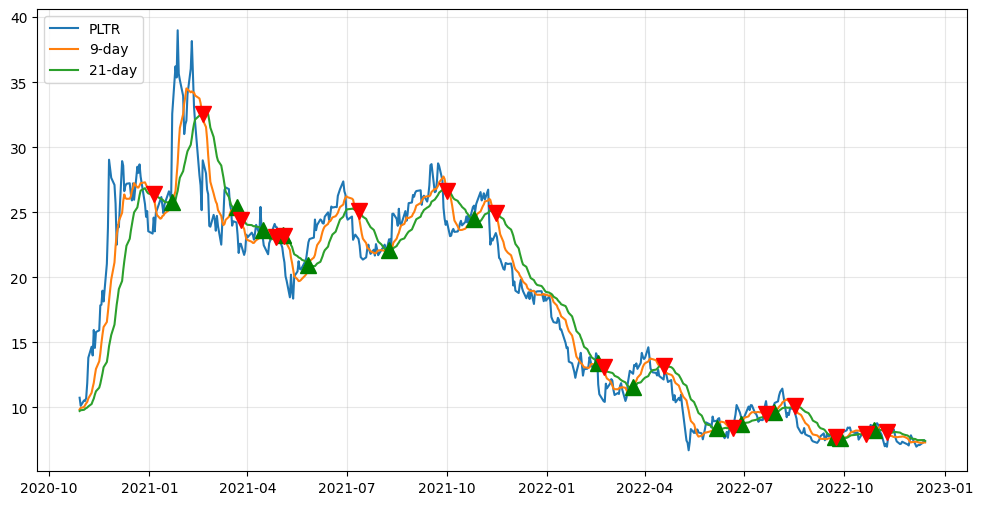

In [19]:
# Plot visuals 
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha =.3)
plt.plot(stock_data.iloc[len_neg:]['Close'], label = str.upper(ticker)) 
plt.plot(stock_data.iloc[len_neg:]['9-day'], label = '9-day') 
plt.plot(stock_data.iloc[len_neg:]['21-day'], label = '21-day') 
plt.plot(stock_data[len_neg:].loc[stock_data.entry == 2].index, stock_data[len_neg:]['9-day'][stock_data.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(stock_data[len_neg:].loc[stock_data.entry == -2].index, stock_data[len_neg:]['21-day'][stock_data.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2); 

In [20]:
stock_data.head(1)

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2020-10-29,22,10.9,11.1,10.56,10.75,9.852222,9.729524,1,NaN,NaN,NaN


In [21]:
# System return
stock_data['system_return'] = stock_data['signal'] * stock_data['return']

stock_data.head(10)

/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_21878/65077885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['system_return'] = stock_data['signal'] * stock_data['return']


,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2020-10-29,22,10.90,11.10,10.56,10.75,9.852222,9.729524,1,NaN,NaN,NaN
2020-10-30,23,10.61,10.68,9.85,10.13,9.967778,9.789048,1,-0.059404,-0.059404,0.0
2020-11-02,24,10.23,10.57,10.23,10.54,10.030000,9.820952,1,0.039676,0.039676,0.0
2020-11-03,25,10.57,10.94,10.44,10.50,10.171111,9.884762,1,-0.003802,-0.003802,0.0
2020-11-04,26,10.82,10.92,10.55,10.72,10.315556,9.954762,1,0.020736,0.020736,0.0
2020-11-05,27,10.90,12.13,10.85,11.88,10.431111,9.993810,1,0.102745,0.102745,0.0
2020-11-06,28,12.22,14.96,12.05,13.83,10.696667,10.083333,1,0.151984,0.151984,0.0
2020-11-09,29,14.96,15.90,14.11,14.67,11.127778,10.265714,1,0.058964,0.058964,0.0
2020-11-10,30,14.99,15.01,13.18,14.00,11.541111,10.490476,1,-0.046747,-0.046747,0.0


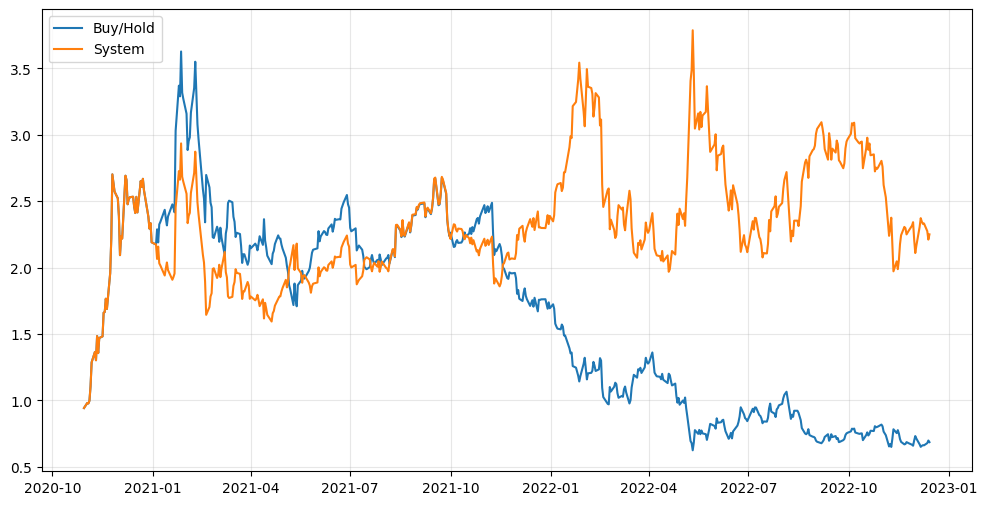

In [22]:
# Plot
plt.plot(np.exp(stock_data['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(stock_data['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [23]:
 # Overall return
return_percent_change = round((np.exp(stock_data['return']).cumprod()[-1] -1) * 100, 2)

return_percent_change

-31.45

In [24]:
# Overall (system) return 
system_percent_change = round((np.exp(stock_data['system_return']).cumprod()[-1] -1) * 100, 2)

system_percent_change

125.03

| END OF PROGRAM |
| ----------- |
| Notes for future DEV, and reference code below |

In [25]:
stock_data.iloc[-1+last_r:]['21-day']

Date
2022-12-14    7.433333
Name: 21-day, dtype: float64

In [26]:
stock_data.iloc[-1+last_r:]

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2022-12-14,557,7.5,7.6,7.3201,7.3694,7.31,7.433333,-1,-0.017567,0.017567,0.0


In [27]:
str.upper(ticker) 

'PLTR'